# Python Project : Austin Police Department Analysis

## Problem Statement

You are a data analyst for the Austin Police Department (APD), responsible for examining over 1.76 million 911 calls to improve response times, identify critical incidents, assess mental health impacts, and report on the effectiveness of resource allocation. Your task is to use python to analyze trends, performance metrics, and safety issues, helping to enhance both officer and community safety.
1. Improving Response Times
Problem: The department wants to understand the factors that affect response times. You are tasked with identifying patterns where response times are high and suggesting changes to reduce these times.
2. Identifying Mental Health-Related Incidents
Problem: The city council is concerned about mental health-related incidents and wants a report detailing how often these incidents occur, their outcomes, and any patterns.
3. Assessing Resource Allocation and Unit Efficiency
Problem: The APD needs to optimize the number of units dispatched to incidents, ensuring enough officers are present without over-allocating resources.
4. Analyzing Incidents by Day of Week and Hour
Problem: The department wants to understand peak times for different types of incidents to adjust patrol schedules accordingly.
5. Monitoring High-Priority Incidents
Problem: High-priority incidents (priority level 0 or 1) need special attention to ensure that they are being handled efficiently. The APD wants a report showing these incidents, their outcomes, and any injuries sustained by officers or civilians.
6. Geospatial Analysis of Incident Locations
Problem: The APD wants to understand how incidents are distributed across different council districts and census block groups to better allocate resources.

## Data Dictionary

* incident_number : An unique integer identifying a computer-aided dispatch incident, consisting of a two-digit year number, three-digit day-of-year and four-digit incident-count number.
* incident_type: A flag indicating whether a given incident was dispatched or officer-initiated. Dispatched incidents are received via 911 calls while officer-initiated incidents are created by officers in the field.
* mental_health_flag : A flag indicating whether a given incident was mental-health related or not.
* priority_level: The priority level assigned to the incident at the time of the first officer's arrival. Priority levels range between 0 and 4, with 0 being the highest priority and 4 being the lowest priority.
* response_datetime: The date and time that the 911 call-takers Emergency Call Taker (ECT) screen opened following the 911 call being answered in the case of dispatched incidents.
* response_day_of_week: The three-character day of week of the Response Datetime.
* response_hour: An integer representing the hour of day of the Response Datetime.
* first_unit_arrived_datetime: The date and time that the first APD unit arrived on scene to the incident.
* call_closed_datetime: The date and time that the incident was closed, indicating that all units have left the scene and it is no longer active.
* sector: The Austin Police Department patrol sector where the incident occurred.
* initial_problem_description: A preliminary description of the problem meant to be addressed by the CAD incident based on either the information given to the 911 call taker in the case of dispatched incidents, or information collected by officers in the case of officer-initiated incidents. 
* initial_problem_category: A general category describing the problem that the CAD incident was meant to address based on the Initial Problem Description value.
* final_problem_description: A description of the ultimate issue that was meant to be addressed by the CAD incident. 
* final_problem_category: A general category describing the problem that the CAD incident was meant to address based on the Final Problem Description value.
* number_of_units_arrived: A count of the number of APD units that arrived on scene in response to the CAD incident. 
* unit_time_on_scene: The total amount of time spent on scene by all APD units in seconds.
* call_disposition_description: A description of the outcome of the call.
* report_written_flag: A flag indicating that a responding unit wrote a report in the Records Management System based on this CAD incident. 
* response_time: The amount of time between when the 911 call was answered when the first officer arrived on scene in seconds. Please note that this field is not applicable to officer-initiated incidents and is left blank for such incidents.
* officer_injured_killed_count: A count of officers seriously injured or killed in a use of force related to this CAD incident where the subject of the use of force was a person with mental illness.
* subject_injured_killed_count: A count of the subjects of a use of force who were seriously injured or killed in a use of force related to this CAD incident where those subjects had a mental illness.
* other_injured_killed_count: The number of persons seriously injured or killed in an incident related to this CAD incident where there was also a use of force against an individual with mental illness where either the subject of that use of force or the officer involved in that use of force were seriously injured or killed.
* geoid: A Census Block Group identifier; a concatenation of the current state FIPS code, county FIPS code, census tract code, and block group number.
* council_district: The council district where the offense occurred.



## Import all the necessary libraries 

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn  as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# round to two decimal places
pd.options.display.float_format = '{:.2f}'.format

## Upload the data set

In [2]:
df = pd.read_csv('APDservice_copy.csv')

# return the first 5 rows of the data set
df.head()

,Incident Number,Incident Type,Mental Health Flag,Priority Level,Response Datetime,Response Day of Week,Response Hour,First Unit Arrived Datetime,Call Closed Datetime,Sector,...,Unit Time on Scene,Call Disposition Description,Report Written Flag,Response Time,Officer Injured/Killed Count,Subject Injured/Killed Count,Other Injured/Killed Count,Geo ID,Census Block Group,Council District
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,9/30/2024 23:55,Mon,23.00,9/30/2024 23:58,10/1/2024 1:22,Edward,...,9989.00,No Report,No,222.00,0.00,0.00,0.00,484530000000.00,4530409002.00,4.00
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,9/30/2024 23:54,Mon,23.00,10/1/2024 0:13,10/1/2024 0:18,David,...,611.00,No Report,No,1327.00,0.00,0.00,0.00,484530000000.00,4530013081.00,3.00
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,9/30/2024 23:54,Mon,23.00,9/30/2024 23:58,10/1/2024 0:50,Ida,...,3112.00,False Alarm,No,243.00,0.00,0.00,0.00,484530000000.00,4530434002.00,4.00
3,242741638,Dispatched Incident,Mental Health Incident,Priority 3,9/30/2024 23:54,Mon,23.00,10/1/2024 1:23,10/1/2024 1:23,Edward,...,4.00,No Report,No,5503.00,0.00,0.00,0.00,484530000000.00,4530442001.00,7.00
4,242741637,Dispatched Incident,Not Mental Health Incident,Priority 2,9/30/2024 23:54,Mon,23.00,9/30/2024 23:58,10/1/2024 0:43,Frank,...,6063.00,No Report,No,335.00,0.00,0.00,0.00,484530000000.00,4530024223.00,2.00


In [3]:
# let's find out the number of rows and columns in the data
df.shape

(952832, 25)

- There are 952832 rows and 25 columns in the data

In [4]:
# let's check the columns in the data
df.columns

Index(['Incident Number', 'Incident Type', 'Mental Health Flag',
       'Priority Level', 'Response Datetime', 'Response Day of Week',
       'Response Hour', 'First Unit Arrived Datetime', 'Call Closed Datetime',
       'Sector', 'Initial Problem Description', 'Initial Problem Category',
       'Final Problem Description', 'Final Problem Category',
       'Number of Units Arrived', 'Unit Time on Scene',
       'Call Disposition Description', 'Report Written Flag', 'Response Time',
       'Officer Injured/Killed Count', 'Subject Injured/Killed Count',
       'Other Injured/Killed Count', 'Geo ID', 'Census Block Group',
       'Council District'],
      dtype='object')

In [5]:
# let's rename the column
df.columns = ['Incident_Number', 'Incident_Type', 'Mental_Health_Flag',
       'Priority_Level', 'Response_Datetime', 'Response_Day_of_Week',
       'Response_Hour', 'First_Unit_Arrived_Datetime', 'Call_Closed_Datetime',
       'Sector', 'Initial_Problem_Descrip', 'Initial_Problem_Category',
       'Final_Problem_Descrip', 'Final_Problem_Category',
       'Number_of_Units_Arrived', 'Unit_Time_on_Scene',
       'Call_Disposition_Descrip', 'Report_Written_Flag', 'Response_Time',
       'Officer_Injured/Killed_Cnt', 'Subject_Injured/Killed_Cnt',
       'Other_Injured/Killed_Cnt', 'Geo_ID', 'Census_Block_Grp',
       'Council_District']

In [6]:
# let's check if it has been changed
df.columns

Index(['Incident_Number', 'Incident_Type', 'Mental_Health_Flag',
       'Priority_Level', 'Response_Datetime', 'Response_Day_of_Week',
       'Response_Hour', 'First_Unit_Arrived_Datetime', 'Call_Closed_Datetime',
       'Sector', 'Initial_Problem_Descrip', 'Initial_Problem_Category',
       'Final_Problem_Descrip', 'Final_Problem_Category',
       'Number_of_Units_Arrived', 'Unit_Time_on_Scene',
       'Call_Disposition_Descrip', 'Report_Written_Flag', 'Response_Time',
       'Officer_Injured/Killed_Cnt', 'Subject_Injured/Killed_Cnt',
       'Other_Injured/Killed_Cnt', 'Geo_ID', 'Census_Block_Grp',
       'Council_District'],
      dtype='object')

In [7]:
# to check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952832 entries, 0 to 952831
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Incident_Number              952832 non-null  object 
 1   Incident_Type                952828 non-null  object 
 2   Mental_Health_Flag           952828 non-null  object 
 3   Priority_Level               952828 non-null  object 
 4   Response_Datetime            952828 non-null  object 
 5   Response_Day_of_Week         952828 non-null  object 
 6   Response_Hour                952828 non-null  float64
 7   First_Unit_Arrived_Datetime  952828 non-null  object 
 8   Call_Closed_Datetime         952828 non-null  object 
 9   Sector                       952828 non-null  object 
 10  Initial_Problem_Descrip      952828 non-null  object 
 11  Initial_Problem_Category     952828 non-null  object 
 12  Final_Problem_Descrip        952828 non-null  object 
 13 

* The `Response_Datetime`is in object data type, we need to convert to datetime format.
* The `First_Unit_Arrived_Datetime`is in object data type, we need to convert to datetime format.
* The `Call_Closed_Datetime`is in object data type, we need to convert to datetime format. 
* The `Council_District` is in float, we need to convert to object.
* There are also missing values in each of the columns.

In [8]:
# check the statistical summary
df.describe()

,Response_Hour,Number_of_Units_Arrived,Unit_Time_on_Scene,Response_Time,Officer_Injured/Killed_Cnt,Subject_Injured/Killed_Cnt,Other_Injured/Killed_Cnt,Geo_ID,Census_Block_Grp,Council_District
count,952828.00,952828.00,952808.00,952827.00,952827.00,952827.00,952827.00,952824.00,952824.00,952827.00
mean,12.83,1.93,6090.61,2254.09,0.00,0.00,0.00,484544687864.71,4544831290.56,4.89
std,6.68,1.44,13578.25,4421.83,0.00,0.00,0.00,77185821.71,77196812.36,2.87
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,482090000000.00,2090109121.00,0.00
25%,8.00,1.00,1005.00,448.00,0.00,0.00,0.00,484530000000.00,4530015041.00,3.00
50%,14.00,2.00,2931.00,832.00,0.00,0.00,0.00,484530000000.00,4530024111.00,4.00
75%,18.00,2.00,6767.00,2050.00,0.00,0.00,0.00,484530000000.00,4530403003.00,7.00
max,23.00,101.00,2460453.00,182878.00,1.00,1.00,0.00,484910000000.00,4910206022.00,10.00


* Observations:
- The response hour ranges from 0:00 to 23:00(11pm). The average response hour is approximately 13:00.
- The number of units arrived on scene ranges between 1 and 101 units. There are outliers present in this column.
- The average number of units arrived on scene is approximately 2 units.
- The mean amount of time spent on scene by all units is 6091 seconds.
- The average response time is 2254 seconds.

In [9]:
# From df.info(), we noticed that there are some columns with the wrong data types.
# let's convert them
# convert `Response_Datetime` column to datatime function using pd.to_datetime
df['Response_Datetime'] = pd.to_datetime(df['Response_Datetime'], format='%m/%d/%Y %H:%M')

# convert `First_Unit_Arrived_Datetime` column to datetime function
df['First_Unit_Arrived_Datetime'] = pd.to_datetime(df['First_Unit_Arrived_Datetime'], format='%m/%d/%Y %H:%M')

# convert `Call_Closed_Datetime ` column to datetime function
df['Call_Closed_Datetime'] = pd.to_datetime(df['Call_Closed_Datetime'], format='%m/%d/%Y %H:%M')

In [10]:
# let's check data type
df.dtypes

Incident_Number                        object
Incident_Type                          object
Mental_Health_Flag                     object
Priority_Level                         object
Response_Datetime              datetime64[ns]
Response_Day_of_Week                   object
Response_Hour                         float64
First_Unit_Arrived_Datetime    datetime64[ns]
Call_Closed_Datetime           datetime64[ns]
Sector                                 object
Initial_Problem_Descrip                object
Initial_Problem_Category               object
Final_Problem_Descrip                  object
Final_Problem_Category                 object
Number_of_Units_Arrived               float64
Unit_Time_on_Scene                    float64
Call_Disposition_Descrip               object
Report_Written_Flag                    object
Response_Time                         float64
Officer_Injured/Killed_Cnt            float64
Subject_Injured/Killed_Cnt            float64
Other_Injured/Killed_Cnt          

In [11]:
# let's check the unique values in the `Council_District` column
df['Council_District'].unique()

array([ 4.,  3.,  7.,  2., 10.,  9.,  8.,  5.,  1.,  6.,  0., nan])

In [12]:
# Let's convert the `Council_District` column to a string 
df['Council_District'] = df['Council_District'].astype(str)

In [13]:
# let's check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952832 entries, 0 to 952831
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Incident_Number              952832 non-null  object        
 1   Incident_Type                952828 non-null  object        
 2   Mental_Health_Flag           952828 non-null  object        
 3   Priority_Level               952828 non-null  object        
 4   Response_Datetime            952828 non-null  datetime64[ns]
 5   Response_Day_of_Week         952828 non-null  object        
 6   Response_Hour                952828 non-null  float64       
 7   First_Unit_Arrived_Datetime  952828 non-null  datetime64[ns]
 8   Call_Closed_Datetime         952828 non-null  datetime64[ns]
 9   Sector                       952828 non-null  object        
 10  Initial_Problem_Descrip      952828 non-null  object        
 11  Initial_Problem_Category  

In [14]:
# let's check the data 
df.head()

,Incident_Number,Incident_Type,Mental_Health_Flag,Priority_Level,Response_Datetime,Response_Day_of_Week,Response_Hour,First_Unit_Arrived_Datetime,Call_Closed_Datetime,Sector,...,Unit_Time_on_Scene,Call_Disposition_Descrip,Report_Written_Flag,Response_Time,Officer_Injured/Killed_Cnt,Subject_Injured/Killed_Cnt,Other_Injured/Killed_Cnt,Geo_ID,Census_Block_Grp,Council_District
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,2024-09-30 23:55:00,Mon,23.00,2024-09-30 23:58:00,2024-10-01 01:22:00,Edward,...,9989.00,No Report,No,222.00,0.00,0.00,0.00,484530000000.00,4530409002.00,4.0
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23.00,2024-10-01 00:13:00,2024-10-01 00:18:00,David,...,611.00,No Report,No,1327.00,0.00,0.00,0.00,484530000000.00,4530013081.00,3.0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23.00,2024-09-30 23:58:00,2024-10-01 00:50:00,Ida,...,3112.00,False Alarm,No,243.00,0.00,0.00,0.00,484530000000.00,4530434002.00,4.0
3,242741638,Dispatched Incident,Mental Health Incident,Priority 3,2024-09-30 23:54:00,Mon,23.00,2024-10-01 01:23:00,2024-10-01 01:23:00,Edward,...,4.00,No Report,No,5503.00,0.00,0.00,0.00,484530000000.00,4530442001.00,7.0
4,242741637,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23.00,2024-09-30 23:58:00,2024-10-01 00:43:00,Frank,...,6063.00,No Report,No,335.00,0.00,0.00,0.00,484530000000.00,4530024223.00,2.0


In [15]:
# let's check for the unique values in the `Incident_Type` column
df['Incident_Type'].unique()

array(['Dispatched Incident', nan], dtype=object)

- There are only Dispatched Incident type in this column.
- There are missing values present in this column.

In [16]:
# Let's check for the unique values in the `Mental_Health_Flag` column
print(df['Mental_Health_Flag'].unique())

print(df['Mental_Health_Flag'].value_counts(normalize=True))

['Not Mental Health Incident' 'Mental Health Incident' nan]
Not Mental Health Incident   0.87
Mental Health Incident       0.13
Name: Mental_Health_Flag, dtype: float64


- There are Mental Health and Non-mental health incidents in this column.
- 13% of the data are mental health incidents while 87% of the data are non-mental health incidents.

In [17]:
# Let's check for the unique values in the `Priority_Level` column
print(df['Priority_Level'].unique())

print(df['Priority_Level'].value_counts(normalize=True))

['Priority 0' 'Priority 2' 'Priority 3' 'Priority 1' nan]
Priority 2   0.50
Priority 1   0.19
Priority 3   0.18
Priority 0   0.13
Name: Priority_Level, dtype: float64


- There are 4 priority levels in the dataset.Priority 0, Priority 1, Priority 2, Priority 3. Priority 0 and 1 are high priorities and Priority 2 and 3 are low priority.
- 50% of the data are Priority 2 while approximately 19% of the data are priority 1 and 13% of the data are priority 0.

In [18]:
# Let's check for the unique values in the `Response_Day_of_Week` column
print(df['Response_Day_of_Week'].unique())

print(df['Response_Day_of_Week'].value_counts(normalize=True))

['Mon' 'Sun' 'Sat' 'Fri' 'Thu' 'Wed' 'Tue' nan]
Fri   0.15
Sat   0.15
Mon   0.14
Sun   0.14
Thu   0.14
Wed   0.14
Tue   0.14
Name: Response_Day_of_Week, dtype: float64


- The response days of the week are Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday
- There are more dispatched incidents(911 calls) on Fridays and Saturdays compared to other days.

In [19]:
# let's check for the response hours unique hours 
print(df['Response_Hour'].unique())

print(df['Response_Hour'].value_counts())

[23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.
  5.  4.  3.  2.  1.  0. nan]
17.00    51921
18.00    51234
16.00    50068
19.00    48791
20.00    48063
15.00    48034
21.00    47905
22.00    46002
14.00    45175
13.00    44804
12.00    44409
11.00    42630
23.00    42092
10.00    41603
9.00     39780
8.00     38251
0.00     38068
7.00     32810
1.00     32031
2.00     29590
6.00     24906
3.00     24421
4.00     20509
5.00     19731
Name: Response_Hour, dtype: int64


- The response hours ae between the hours of 0:00 to 23:00
- There are more 911 calls recorded/taken at 17:00(5pm),18:00(6pm) and 16:00(4pm).

In [20]:
# Let's check for the unique values in the `Sector` column
print(df['Sector'].unique())

print(df['Sector'].value_counts(normalize=True))

['Edward' 'David' 'Ida' 'Frank' 'Charlie' 'Adam' 'Baker' 'Airport' 'Henry'
 'George' 'Other' nan]
Edward    0.14
David     0.13
Frank     0.12
Adam      0.12
Charlie   0.11
Baker     0.11
Ida       0.10
Henry     0.10
George    0.06
Airport   0.02
Other     0.00
Name: Sector, dtype: float64


- There are 11 sectors in the data set.
- Edward sector has the highest number of dispatched incidents.
- Airport sector has the lowest number of dispatched incidents.

In [21]:
# let's check the unique items on the `Call_Disposition_Descrip` column
print(df['Call_Disposition_Descrip'].unique())

# let's check the frequency of each of these items in the `Call_Disposition_Descrip` column
print(df['Call_Disposition_Descrip'].value_counts(normalize=True))

['No Report' 'False Alarm' 'Unable To Locate' 'Report Written'
 'Supplement Written' 'Primary unit will adv' 'Report Written MH'
 '10/8 From Traffic' 'Non-Police Matter' 'No Report MH'
 'District Representatives' 'Field Observation' 'Citation only' 'Warning'
 'Telehealth No Report' 'Reassigned call' 'Telehealth Report Written'
 'Arrest only' 'Telehealth Not Used' 'Citation and Arrest' 'U{' nan]
No Report                   0.42
Report Written              0.26
Unable To Locate            0.16
False Alarm                 0.09
Supplement Written          0.02
Report Written MH           0.02
Non-Police Matter           0.02
10/8 From Traffic           0.00
No Report MH                0.00
Field Observation           0.00
Primary unit will adv       0.00
District Representatives    0.00
Citation only               0.00
Reassigned call             0.00
Arrest only                 0.00
Telehealth Report Written   0.00
Telehealth No Report        0.00
Warning                     0.00
Citation

-There are 20 descriptions of the outcomes of the 911 calls.


In [22]:
# Let's check for the unique problems in the `Initial_Problem_Category` column
print(df['Initial_Problem_Category'].unique())

print(df['Initial_Problem_Category'].value_counts())

['Suspicious Things' 'Alarms' 'Crashes' 'Drugs' 'Assistance'
 'Traffic Stop/Hazard' 'Deceased/Injured' 'Disturbance' 'Trespassing'
 'Welfare Check' 'Other' 'Shoot/Stab' 'Missing Persons/Kidnapping'
 'Sex Crimes' 'Auto Theft' 'Disorderly Conduct' 'Theft' 'Animal Related'
 'Property Damage/Vandalism' 'Bomb/Explosives' 'Burglary' 'Administrative'
 'Robbery' 'DUI/DWI' 'Warrants/RTA' 'Simple Assault' 'Prostitution'
 'Weapons/Firearms Violations' 'Person Stop/FO' 'Lost/Found Property'
 'Intimidation' 'Aggravated Assault' 'Child Abuse/Neglect' 'Fraud/Forgery'
 'Viol PO/Bond' 'Evading/Resisting Arrest' 'missing' 'Arson' 'Homicide'
 'Gambling' nan]
Disturbance                    157135
Welfare Check                  106246
Suspicious Things              101012
Alarms                          99661
Trespassing                     98342
Traffic Stop/Hazard             68653
Crashes                         68453
Other                           63786
Assistance                      39206
Auto Theft

- The top 3 problems addressed in the data set are Disturbances, Welfare Check and Suspicious Things.

In [23]:
# let's check the unique problems in the `Final_Problem_Category` column
print(df['Final_Problem_Category'].unique())

['Suspicious Things' 'Alarms' 'Welfare Check' 'Crashes' 'DUI/DWI' 'Drugs'
 'Assistance' 'Deceased/Injured' 'Disturbance' 'Trespassing'
 'Traffic Stop/Hazard' 'Other' 'Shoot/Stab' 'Missing Persons/Kidnapping'
 'Aggravated Assault' 'Simple Assault' 'Auto Theft' 'Disorderly Conduct'
 'Sex Crimes' 'Theft' 'Homicide' 'Evading/Resisting Arrest'
 'Animal Related' 'Property Damage/Vandalism' 'Warrants/RTA'
 'Intimidation' 'Child Abuse/Neglect' 'Robbery' 'Administrative'
 'Burglary' 'Weapons/Firearms Violations' 'Viol PO/Bond' 'Fraud/Forgery'
 'Lost/Found Property' 'Person Stop/FO' 'Bomb/Explosives' 'Arson'
 'missing' 'Prostitution' 'Gambling' nan]


In [24]:
# Let's check the unque values in the `Report_Written_Flag` column
print(df['Report_Written_Flag'].unique())

print(df['Report_Written_Flag'].value_counts())

['No' 'Yes' nan]
No     708512
Yes    244315
Name: Report_Written_Flag, dtype: int64


- There are 2 categories in the `Report_Written_Flag` column.

In [25]:
# Let's check for the unique Goe_ID in the column
print(df['Geo_ID'].unique())

print(df['Geo_ID'].value_counts())

[4.8453e+11 4.8491e+11 4.8454e+11 4.8209e+11        nan]
484530000000.00    897162
484910000000.00     36929
484540000000.00     18641
482090000000.00        92
Name: Geo_ID, dtype: int64


In [26]:
# Let's check the unique Council Districts in the column
print(df['Council_District'].unique())

print(df['Council_District'].value_counts())

['4.0' '3.0' '7.0' '2.0' '10.0' '9.0' '8.0' '5.0' '1.0' '6.0' '0.0' 'nan']
3.0     144812
9.0     135055
4.0     127457
1.0     110152
7.0     104882
2.0     103728
5.0      77662
6.0      53016
10.0     45344
8.0      35639
0.0      15080
nan          5
Name: Council_District, dtype: int64


- There are 11 council districts in the data set.
- There are more incidents in Districts 3.0, 9.0 and 4.0

## Check for missing values

In [27]:
# Let's check for missing values
df.isnull().sum()

Incident_Number                 0
Incident_Type                   4
Mental_Health_Flag              4
Priority_Level                  4
Response_Datetime               4
Response_Day_of_Week            4
Response_Hour                   4
First_Unit_Arrived_Datetime     4
Call_Closed_Datetime            4
Sector                          4
Initial_Problem_Descrip         4
Initial_Problem_Category        4
Final_Problem_Descrip           4
Final_Problem_Category          4
Number_of_Units_Arrived         4
Unit_Time_on_Scene             24
Call_Disposition_Descrip        4
Report_Written_Flag             5
Response_Time                   5
Officer_Injured/Killed_Cnt      5
Subject_Injured/Killed_Cnt      5
Other_Injured/Killed_Cnt        5
Geo_ID                          8
Census_Block_Grp                8
Council_District                0
dtype: int64

- There are many missing values in the data.


In [28]:
# let's investigate
df.tail()

,Incident_Number,Incident_Type,Mental_Health_Flag,Priority_Level,Response_Datetime,Response_Day_of_Week,Response_Hour,First_Unit_Arrived_Datetime,Call_Closed_Datetime,Sector,...,Unit_Time_on_Scene,Call_Disposition_Descrip,Report_Written_Flag,Response_Time,Officer_Injured/Killed_Cnt,Subject_Injured/Killed_Cnt,Other_Injured/Killed_Cnt,Geo_ID,Census_Block_Grp,Council_District
952827,211730713,Dispatched Incident,Mental Health Incident,Priority 3,2021-06-22 13:00:00,Tue,13.00,2021-06-22 13:24:00,2021-06-22 13:24:00,Baker,...,12.00,U{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
952828,"""error"" : true",NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
952829,"""message"" : ""Internal error""",NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
952830,"""status"" : 500",NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
952831,},NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


- The last 4 rows in the data set contain missing values across all columns. Let's take them out

In [29]:
# Let's check the last 5 rows of the columns not displayed
df[['Initial_Problem_Descrip','Initial_Problem_Category','Final_Problem_Descrip','Final_Problem_Category','Number_of_Units_Arrived']].tail()

,Initial_Problem_Descrip,Initial_Problem_Category,Final_Problem_Descrip,Final_Problem_Category,Number_of_Units_Arrived
952827,Check Welfare Service,Welfare Check,Check Welfare Service,Welfare Check,1.00
952828,NaN,NaN,NaN,NaN,NaN
952829,NaN,NaN,NaN,NaN,NaN
952830,NaN,NaN,NaN,NaN,NaN
952831,NaN,NaN,NaN,NaN,NaN


- The last 4 rows are also missing

In [30]:
# assisgn a variable to drop the last 4 rows
df1 = df.iloc[:-4]

In [31]:
# Let's check the new data set
# Let's check the first 5 rows of the new data
df1.head()

,Incident_Number,Incident_Type,Mental_Health_Flag,Priority_Level,Response_Datetime,Response_Day_of_Week,Response_Hour,First_Unit_Arrived_Datetime,Call_Closed_Datetime,Sector,...,Unit_Time_on_Scene,Call_Disposition_Descrip,Report_Written_Flag,Response_Time,Officer_Injured/Killed_Cnt,Subject_Injured/Killed_Cnt,Other_Injured/Killed_Cnt,Geo_ID,Census_Block_Grp,Council_District
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,2024-09-30 23:55:00,Mon,23.00,2024-09-30 23:58:00,2024-10-01 01:22:00,Edward,...,9989.00,No Report,No,222.00,0.00,0.00,0.00,484530000000.00,4530409002.00,4.0
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23.00,2024-10-01 00:13:00,2024-10-01 00:18:00,David,...,611.00,No Report,No,1327.00,0.00,0.00,0.00,484530000000.00,4530013081.00,3.0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23.00,2024-09-30 23:58:00,2024-10-01 00:50:00,Ida,...,3112.00,False Alarm,No,243.00,0.00,0.00,0.00,484530000000.00,4530434002.00,4.0
3,242741638,Dispatched Incident,Mental Health Incident,Priority 3,2024-09-30 23:54:00,Mon,23.00,2024-10-01 01:23:00,2024-10-01 01:23:00,Edward,...,4.00,No Report,No,5503.00,0.00,0.00,0.00,484530000000.00,4530442001.00,7.0
4,242741637,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23.00,2024-09-30 23:58:00,2024-10-01 00:43:00,Frank,...,6063.00,No Report,No,335.00,0.00,0.00,0.00,484530000000.00,4530024223.00,2.0


In [32]:
# let's check the last 5 rows
df1.tail()

,Incident_Number,Incident_Type,Mental_Health_Flag,Priority_Level,Response_Datetime,Response_Day_of_Week,Response_Hour,First_Unit_Arrived_Datetime,Call_Closed_Datetime,Sector,...,Unit_Time_on_Scene,Call_Disposition_Descrip,Report_Written_Flag,Response_Time,Officer_Injured/Killed_Cnt,Subject_Injured/Killed_Cnt,Other_Injured/Killed_Cnt,Geo_ID,Census_Block_Grp,Council_District
952823,211730723,Dispatched Incident,Not Mental Health Incident,Priority 2,2021-06-22 13:06:00,Tue,13.00,2021-06-22 13:11:00,2021-06-22 13:29:00,Charlie,...,1838.00,No Report,No,331.00,0.00,0.00,0.00,484530000000.00,4530008011.00,3.0
952824,211730720,Dispatched Incident,Mental Health Incident,Priority 1,2021-06-22 13:04:00,Tue,13.00,2021-06-22 13:09:00,2021-06-22 15:31:00,Frank,...,10407.00,Report Written MH,No,317.00,0.00,0.00,0.00,484530000000.00,4530024233.00,2.0
952825,211730717,Dispatched Incident,Mental Health Incident,Priority 1,2021-06-22 13:02:00,Tue,13.00,2021-06-22 13:24:00,2021-06-22 15:08:00,Baker,...,8143.00,Report Written,Yes,1376.00,0.00,0.00,0.00,484530000000.00,4530004012.00,9.0
952826,211730715,Dispatched Incident,Not Mental Health Incident,Priority 3,2021-06-22 13:01:00,Tue,13.00,2021-06-22 13:11:00,2021-06-22 14:13:00,Ida,...,6066.00,No Report,No,800.00,0.00,0.00,0.00,484530000000.00,4530002054.00,7.0
952827,211730713,Dispatched Incident,Mental Health Incident,Priority 3,2021-06-22 13:00:00,Tue,13.00,2021-06-22 13:24:00,2021-06-22 13:24:00,Baker,...,12.00,U{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


In [33]:
# let's check for the number of rows and columns for this new data
df1.shape

(952828, 25)

- There are 952828 rows and 25 columns in the dataset.

In [34]:
# let's check for missing values in this new data set
df1.isnull().sum()

Incident_Number                 0
Incident_Type                   0
Mental_Health_Flag              0
Priority_Level                  0
Response_Datetime               0
Response_Day_of_Week            0
Response_Hour                   0
First_Unit_Arrived_Datetime     0
Call_Closed_Datetime            0
Sector                          0
Initial_Problem_Descrip         0
Initial_Problem_Category        0
Final_Problem_Descrip           0
Final_Problem_Category          0
Number_of_Units_Arrived         0
Unit_Time_on_Scene             20
Call_Disposition_Descrip        0
Report_Written_Flag             1
Response_Time                   1
Officer_Injured/Killed_Cnt      1
Subject_Injured/Killed_Cnt      1
Other_Injured/Killed_Cnt        1
Geo_ID                          4
Census_Block_Grp                4
Council_District                0
dtype: int64

- There are still some missing values in the new dataset.

In [35]:
# there are some columns that contain 'nan' and 'NaN'
# Let's set a function to check for both 'nan' and actual NaN
def contains_nan_and_string_nan(column):
    return column.isna().any() or (column == 'nan').any()

# Identify columns that contain 'nan' or NaN
df1.columns[df1.apply(contains_nan_and_string_nan)]

Index(['Unit_Time_on_Scene', 'Report_Written_Flag', 'Response_Time',
       'Officer_Injured/Killed_Cnt', 'Subject_Injured/Killed_Cnt',
       'Other_Injured/Killed_Cnt', 'Geo_ID', 'Census_Block_Grp',
       'Council_District'],
      dtype='object')

In [36]:
# Let's replace 'nan' string with actual NaN
df1.replace('nan', np.nan, inplace=True)


In [37]:
# Let's check for missing values again
df1.isna().sum()

Incident_Number                 0
Incident_Type                   0
Mental_Health_Flag              0
Priority_Level                  0
Response_Datetime               0
Response_Day_of_Week            0
Response_Hour                   0
First_Unit_Arrived_Datetime     0
Call_Closed_Datetime            0
Sector                          0
Initial_Problem_Descrip         0
Initial_Problem_Category        0
Final_Problem_Descrip           0
Final_Problem_Category          0
Number_of_Units_Arrived         0
Unit_Time_on_Scene             20
Call_Disposition_Descrip        0
Report_Written_Flag             1
Response_Time                   1
Officer_Injured/Killed_Cnt      1
Subject_Injured/Killed_Cnt      1
Other_Injured/Killed_Cnt        1
Geo_ID                          4
Census_Block_Grp                4
Council_District                1
dtype: int64

In [38]:
df1.head()

,Incident_Number,Incident_Type,Mental_Health_Flag,Priority_Level,Response_Datetime,Response_Day_of_Week,Response_Hour,First_Unit_Arrived_Datetime,Call_Closed_Datetime,Sector,...,Unit_Time_on_Scene,Call_Disposition_Descrip,Report_Written_Flag,Response_Time,Officer_Injured/Killed_Cnt,Subject_Injured/Killed_Cnt,Other_Injured/Killed_Cnt,Geo_ID,Census_Block_Grp,Council_District
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,2024-09-30 23:55:00,Mon,23.00,2024-09-30 23:58:00,2024-10-01 01:22:00,Edward,...,9989.00,No Report,No,222.00,0.00,0.00,0.00,484530000000.00,4530409002.00,4.0
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23.00,2024-10-01 00:13:00,2024-10-01 00:18:00,David,...,611.00,No Report,No,1327.00,0.00,0.00,0.00,484530000000.00,4530013081.00,3.0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23.00,2024-09-30 23:58:00,2024-10-01 00:50:00,Ida,...,3112.00,False Alarm,No,243.00,0.00,0.00,0.00,484530000000.00,4530434002.00,4.0
3,242741638,Dispatched Incident,Mental Health Incident,Priority 3,2024-09-30 23:54:00,Mon,23.00,2024-10-01 01:23:00,2024-10-01 01:23:00,Edward,...,4.00,No Report,No,5503.00,0.00,0.00,0.00,484530000000.00,4530442001.00,7.0
4,242741637,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23.00,2024-09-30 23:58:00,2024-10-01 00:43:00,Frank,...,6063.00,No Report,No,335.00,0.00,0.00,0.00,484530000000.00,4530024223.00,2.0


### Univariate Analysis

#### Mental Health Flag

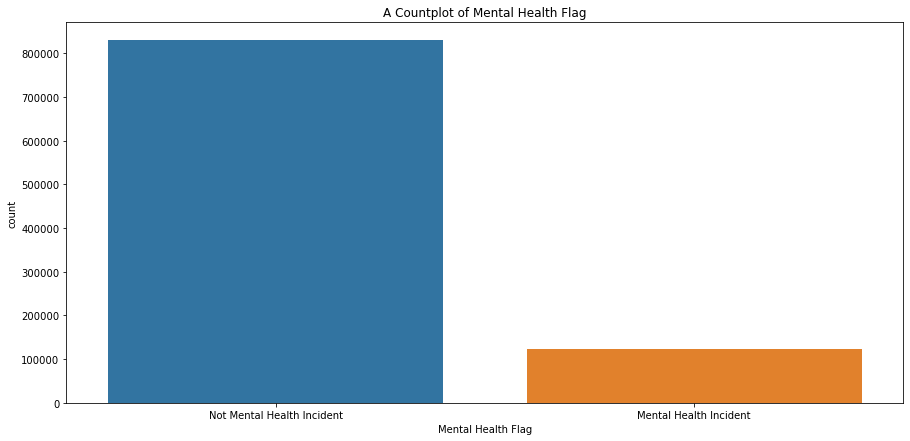

In [39]:
# create a plot to visualize the column
plt.figure(figsize=(15,7))
plt.title('A Countplot of Mental Health Flag')
sns.countplot(data= df1,x='Mental_Health_Flag')
plt.xlabel('Mental Health Flag')
plt.show()

- There are less mental health incidents than non-mental health incidents.

### Priority Level

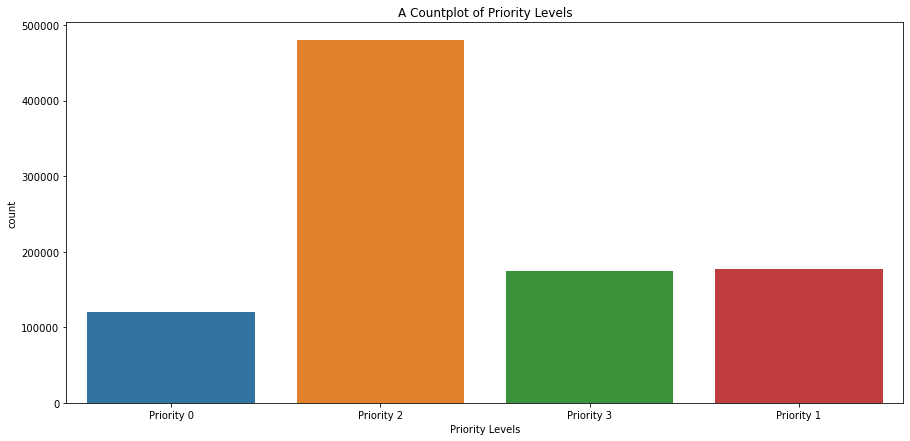

In [40]:
# create a plot to visualize the column
plt.figure(figsize=(15,7))
plt.title('A Countplot of Priority Levels')
sns.countplot(data= df1,x='Priority_Level')
plt.xlabel('Priority Levels')
plt.show()

- Priority 2 make up about 50% of the data.

### Response of the week

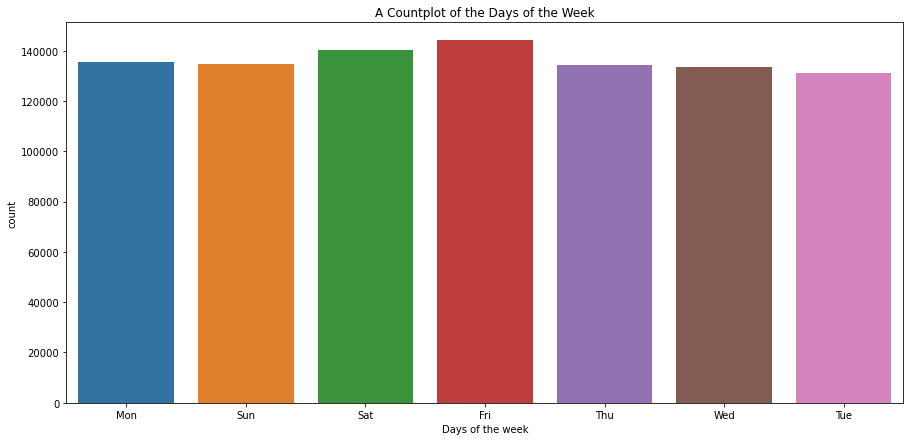

In [41]:
# create a plot to visualize the column
plt.figure(figsize=(15,7))
plt.title('A Countplot of the Days of the Week')
sns.countplot(data= df1,x='Response_Day_of_Week')
plt.xlabel('Days of the week')
plt.show()

- There are more incidents on Friday and Saturday than the other days of the week.

### Sector

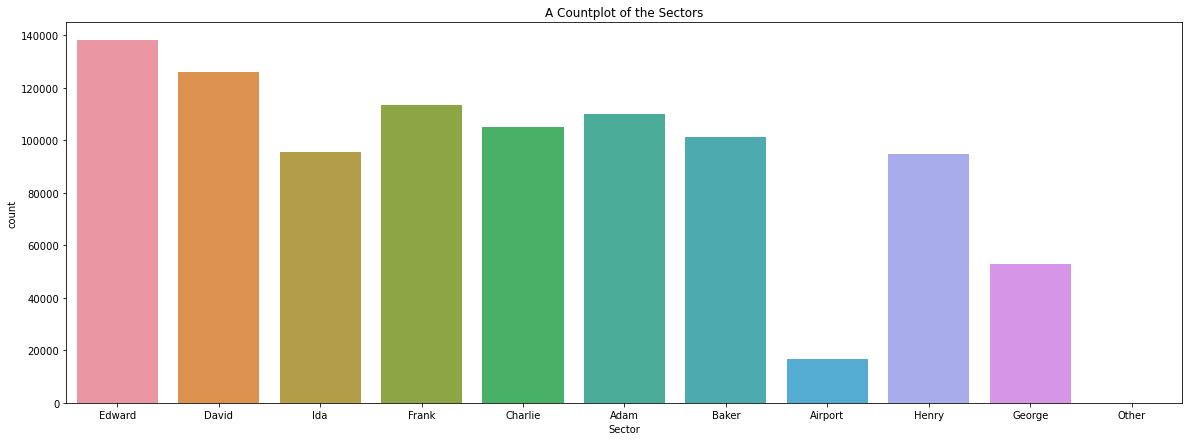

In [42]:
# create a plot to visualize the column
plt.figure(figsize=(20,7))
plt.title('A Countplot of the Sectors')
sns.countplot(data= df1,x='Sector')
plt.xlabel('Sector')
plt.show()

- Edward sector has the highest number of incidents amoung other sectors.

### Response Hour

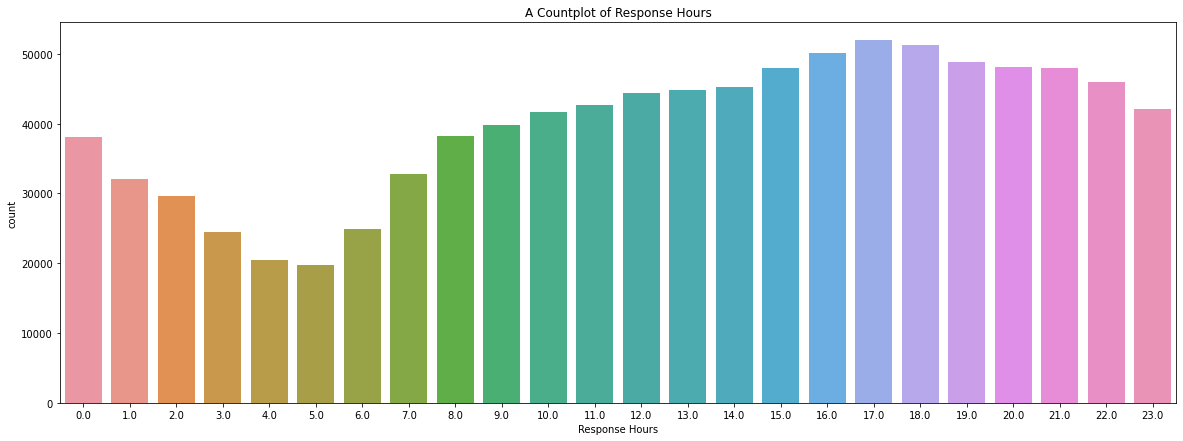

In [43]:
# create a plot to visualize the column
plt.figure(figsize=(20,7))
plt.title('A Countplot of Response Hours')
sns.countplot(data= df1,x='Response_Hour')
plt.xlabel('Response Hours')
plt.show()

- The response hour with the highest frequency is 17:00(5pm), followed by 18:00(6pm) and 16:00(4pm).

### Council District

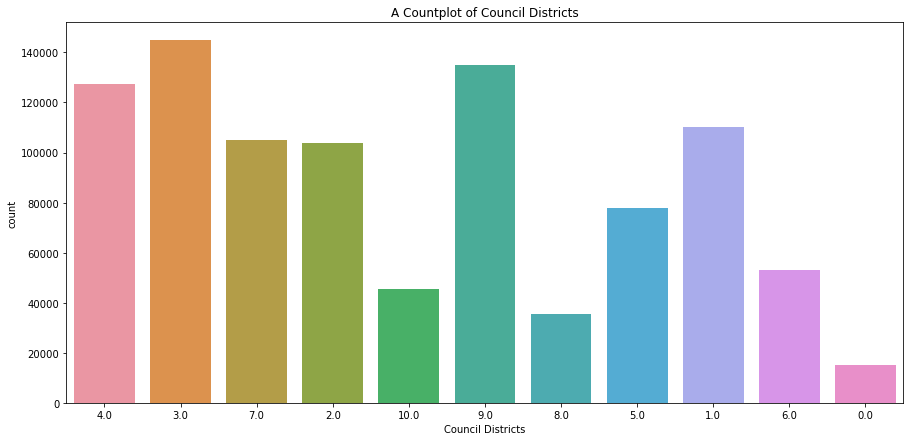

In [44]:
# create a plot to visualize the column
plt.figure(figsize=(15,7))
plt.title('A Countplot of Council Districts')
sns.countplot(data= df1,x='Council_District')
plt.xlabel('Council Districts')
plt.show()

- There are more incidents in Districts 3.0, 9.0 and 4.0.

### Response Time

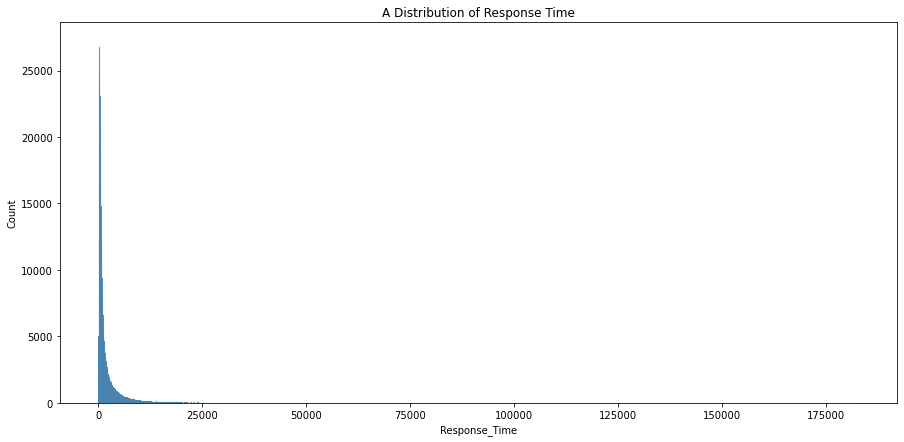

In [45]:
# create a plot to visualize the column
plt.figure(figsize=(15,7))
plt.title('A Distribution of Response Time')
sns.histplot(data= df1,x='Response_Time')
plt.xlabel('Response_Time')
plt.show()

### Bivariate Analysis

#### Average Response Time by Priority

In [46]:
# Calculate average response time by Priority Level
response_time_by_priority = df1.groupby('Priority_Level')['Response_Time'].mean()
print("\nAverage Response Time by Priority Level:\n", response_time_by_priority)


Average Response Time by Priority Level:
 Priority_Level
Priority 0    566.15
Priority 1    756.15
Priority 2   2050.02
Priority 3   5502.47
Name: Response_Time, dtype: float64


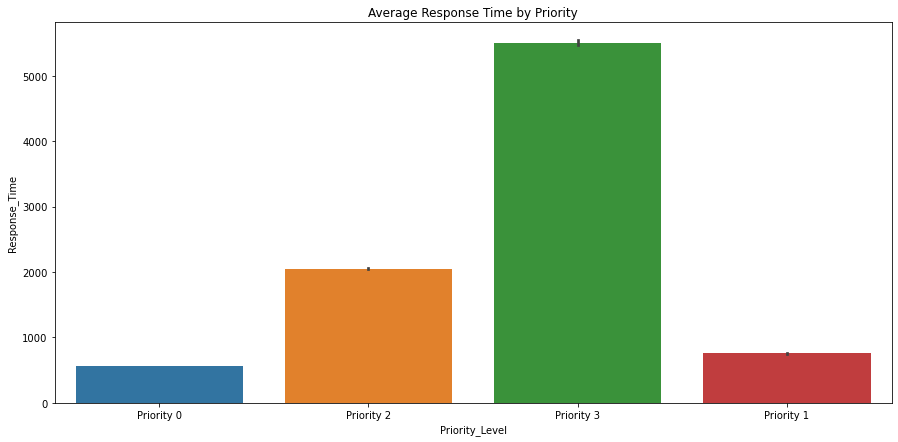

In [47]:
# create a plot to visualize the analysis
plt.figure(figsize=(15,7))
plt.title('Average Response Time by Priority')
sns.barplot(data= df1,x='Priority_Level',y='Response_Time')
plt.xlabel('Priority_Level')
plt.ylabel('Response_Time')
plt.show()

- The priority levels with the lowest average response time are Priority level 0 and 1 
- The priority levels with the highest average response time are Priority 2 and 3.

### Average Response Time by Sector

In [48]:
#  Calculate average response time by sector
response_time_by_sector = df1.groupby('Sector')['Response_Time'].mean()
print("\nAverage Response Time by Sector:\n", response_time_by_sector)


Average Response Time by Sector:
 Sector
Adam      2392.37
Airport    406.32
Baker     1779.93
Charlie   2243.05
David     1991.94
Edward    2908.24
Frank     2593.06
George    1471.25
Henry     2569.86
Ida       2045.22
Other      710.00
Name: Response_Time, dtype: float64


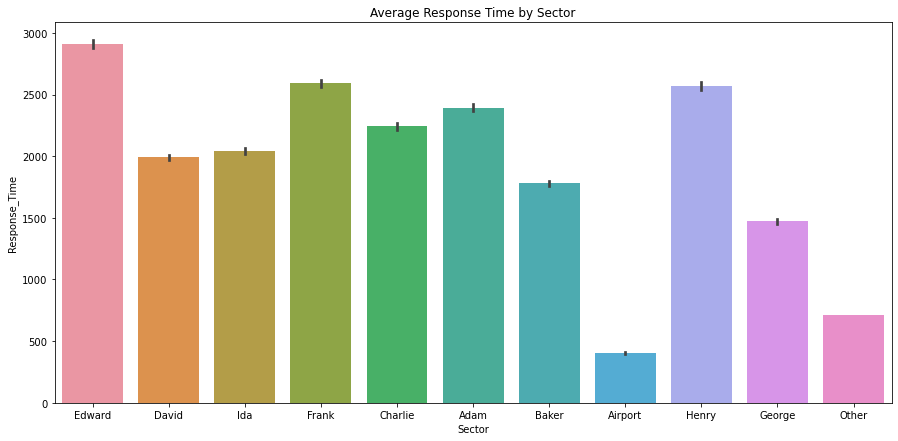

In [49]:
# create a plot to visualize the analysis
plt.figure(figsize=(15,7))
plt.title('Average Response Time by Sector')
sns.barplot(data= df1,x='Sector',y='Response_Time')
plt.xlabel('Sector')
plt.ylabel('Response_Time')
plt.show()

- The sectors with the highest average response time are Edward(2908.24),Frank(2593.06) and Henry(2569.86)
- Airport sector has the least average response time

### Average Response Time by Mental Health Flag

In [50]:
#  Calculate average response time by mental health flag
response_time_by_mentalhealth_flag = df1.groupby('Mental_Health_Flag')['Response_Time'].mean()
print("\nAverage Response Time by Mental Health Flag:\n", response_time_by_mentalhealth_flag)


Average Response Time by Mental Health Flag:
 Mental_Health_Flag
Mental Health Incident       2378.16
Not Mental Health Incident   2235.72
Name: Response_Time, dtype: float64


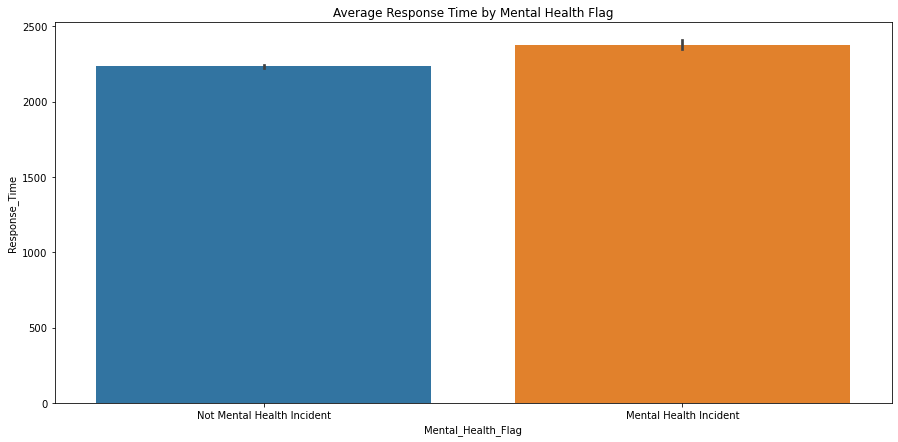

In [51]:
# create a plot to visualize the analysis
plt.figure(figsize=(15,7))
plt.title('Average Response Time by Mental Health Flag')
sns.barplot(data= df1,x='Mental_Health_Flag',y='Response_Time')
plt.xlabel('Mental_Health_Flag')
plt.ylabel('Response_Time')
plt.show()

- The average response time for Mental Health Incidents is 2378.16 seconds
- The average response time for Non-Mental Health Incidents is 2235.72 seconds

### Average Response Time by Day of the week

In [52]:
#  Calculate average response time by day of the week
response_time_by_resp_day_ofweek = df1.groupby('Response_Day_of_Week')['Response_Time'].mean()
print("\nAverage Response Time by Response Day of the Week:\n", response_time_by_resp_day_ofweek)


Average Response Time by Response Day of the Week:
 Response_Day_of_Week
Fri   1882.62
Mon   2308.79
Sat   2520.14
Sun   2347.73
Thu   2204.63
Tue   2251.49
Wed   2277.87
Name: Response_Time, dtype: float64


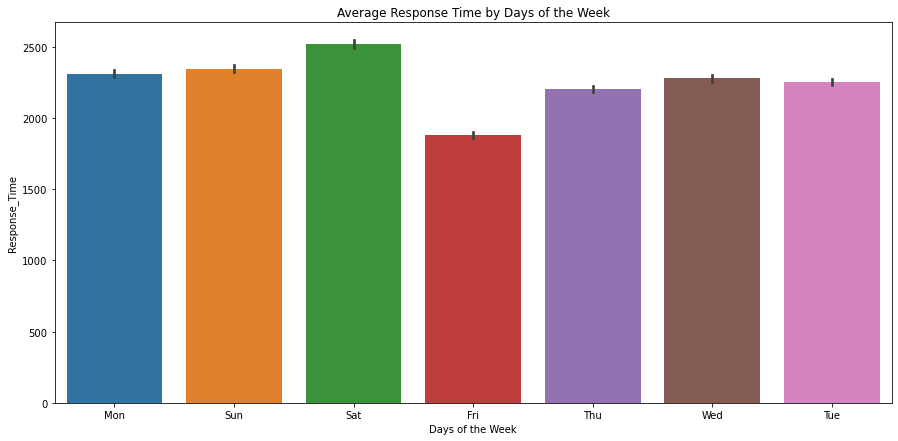

In [53]:
# create a plot to visualize the analysis
plt.figure(figsize=(15,7))
plt.title('Average Response Time by Days of the Week')
sns.barplot(data= df1,x='Response_Day_of_Week',y='Response_Time')
plt.xlabel('Days of the Week')
plt.ylabel('Response_Time')
plt.show()

- Friday has the fastest average response times (1882.62seconds)
- Saturday has the slowest average response time(2520.14 seconds)

### Average Response Time by Council District

In [54]:
#  Calculate average response time by council district
response_time_by_council_dist = df1.groupby('Council_District')['Response_Time'].mean()
print("\nAverage Response Time by Council District:\n", response_time_by_council_dist)


Average Response Time by Council District:
 Council_District
0.0    1703.55
1.0    2609.95
10.0   1903.00
2.0    2426.08
3.0    2256.25
4.0    2595.32
5.0    2101.05
6.0    2354.72
7.0    2345.27
8.0    1970.30
9.0    1739.37
Name: Response_Time, dtype: float64


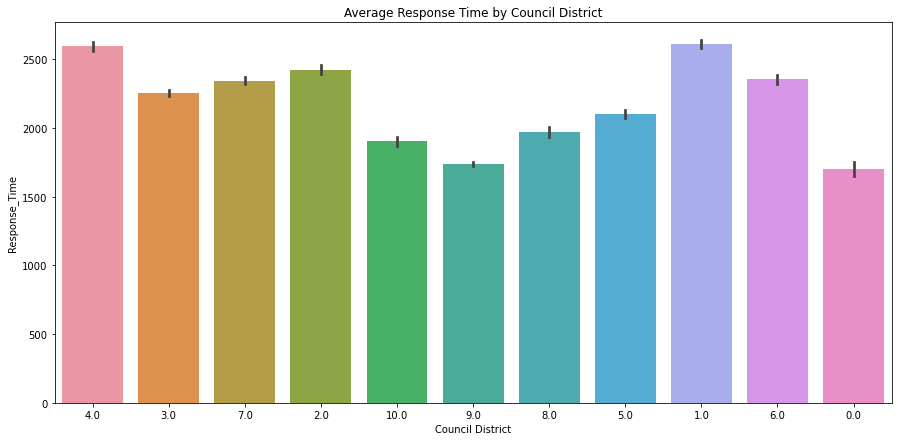

In [55]:
# create a plot to visualize the analysis
plt.figure(figsize=(15,7))
plt.title('Average Response Time by Council District')
sns.barplot(data= df1,x='Council_District',y='Response_Time')
plt.xlabel('Council District')
plt.ylabel('Response_Time')
plt.show()

- District 0.0 has the fastest average response time.
- District 1.0 has the slowest average response time.

### Average Response Time by Hour of the Day

In [56]:
# Response time by hour of the day
response_time_by_hour = df1.groupby('Response_Hour')['Response_Time'].mean()
print("\nAverage Response Time by Hour:\n", response_time_by_hour)



Average Response Time by Hour:
 Response_Hour
0.00    1919.05
1.00    2007.27
2.00    2131.92
3.00    2444.18
4.00    2705.49
5.00    2832.01
6.00    1828.53
7.00    1887.49
8.00    2158.98
9.00    2404.38
10.00   2649.38
11.00   2877.56
12.00   2865.10
13.00   2925.54
14.00   2915.23
15.00   2410.20
16.00   2171.05
17.00   1998.29
18.00   2013.16
19.00   2082.57
20.00   2095.84
21.00   1699.30
22.00   1621.33
23.00   1852.57
Name: Response_Time, dtype: float64


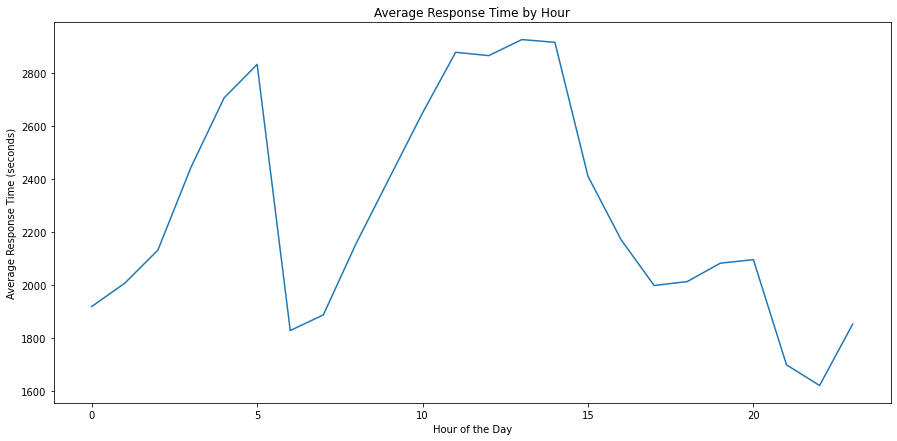

In [57]:
# Plot response time by hour
plt.figure(figsize=(15, 7))
sns.lineplot(x=response_time_by_hour.index, y=response_time_by_hour.values)
plt.title("Average Response Time by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Response Time (seconds)")
plt.show()

- 22:00(10pm) has the fastest average response time, followed by 21:00(9pm)

### Average Number of units dispatched by Incident Type

In [58]:
# Average number of units dispatched per incident type
units_by_incident_type = df1.groupby('Incident_Type')['Number_of_Units_Arrived'].mean()
print("\nAverage Number of Units Dispatched by Incident Type:\n", units_by_incident_type)


Average Number of Units Dispatched by Incident Type:
 Incident_Type
Dispatched Incident   1.93
Name: Number_of_Units_Arrived, dtype: float64


- The average number of units dispatched to scene is approximately 2 units

### Average Number of units by Council District

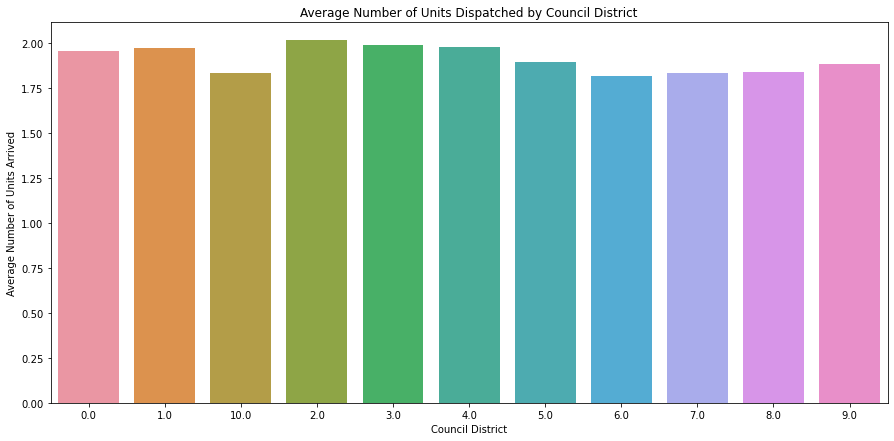

In [59]:
# Average number of units dispatched by council district
units_by_district = df1.groupby('Council_District')['Number_of_Units_Arrived'].mean()

plt.figure(figsize=(15, 7))
sns.barplot(x=units_by_district.index, y=units_by_district.values)
plt.title("Average Number of Units Dispatched by Council District")
plt.xlabel("Council District")
plt.ylabel("Average Number of Units Arrived")
plt.show()

### Key Questions

#### •	What is the total number of incidents that occurred in each sector?

In [60]:
total_incidents_bysector = df1['Sector'].value_counts()
print("\nTotal Number of Incidents in each sector:\n", total_incidents_bysector)


Total Number of Incidents in each sector:
 Edward     137979
David      125807
Frank      113262
Adam       110003
Charlie    105073
Baker      101158
Ida         95481
Henry       94855
George      52699
Airport     16510
Other           1
Name: Sector, dtype: int64


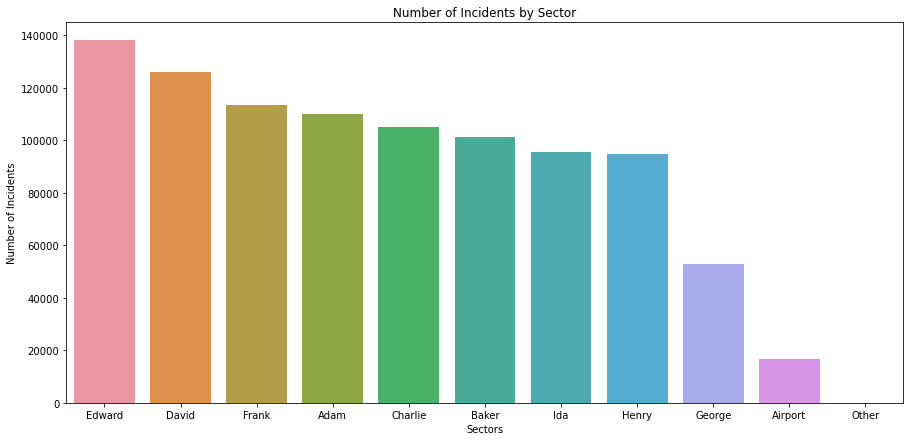

In [61]:
plt.figure(figsize=(15,7))
sns.countplot(data=df1, x='Sector', order=df1['Sector'].value_counts().index)
plt.title('Number of Incidents by Sector')
plt.xlabel('Sectors')
plt.ylabel('Number of Incidents')
plt.show()

- The total number of incidents in Edward sector is 137979, followed by David 125807 and Frank 113262.

#### •	What are the top 5 busiest geographic areas in terms of 911 calls

In [62]:
# count of geographic areas/Council District
busiest_geo_areas = df1['Geo_ID'].value_counts().head()
print("\nTop 5 busiest geographic areas:\n", busiest_geo_areas)


Top 5 busiest geographic areas:
 484530000000.00    897162
484910000000.00     36929
484540000000.00     18641
482090000000.00        92
Name: Geo_ID, dtype: int64


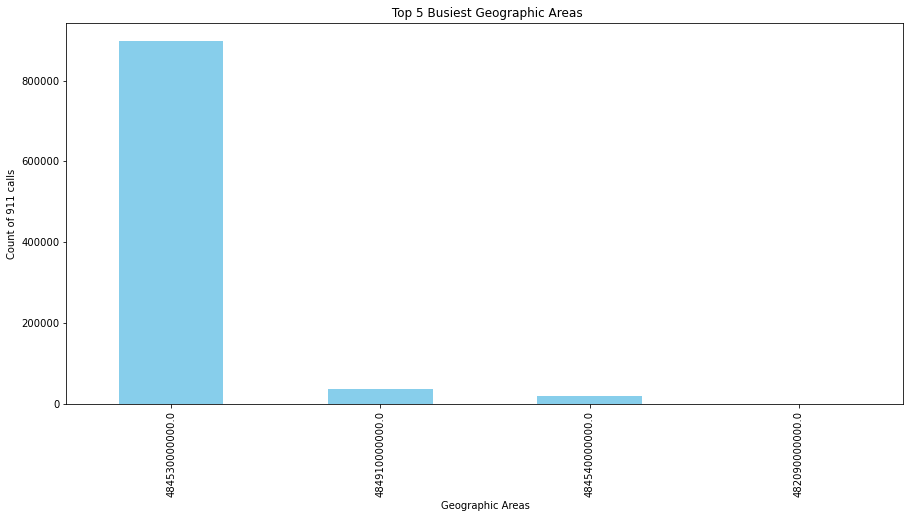

In [63]:
# visualize the top5 busiest areas
plt.figure(figsize=(15,7))
busiest_geo_areas.plot(kind='bar', color='skyblue')
plt.title(' Top 5 Busiest Geographic Areas')
plt.xlabel('Geographic Areas')
plt.ylabel('Count of 911 calls')
plt.show()

- The top 5 busiest geographic areas in terms of 911 calls are  48453, 48491,48454 and 48209

In [64]:
# count of geographic areas/Council District
busiest_district = df1['Council_District'].value_counts().head()
print("\nTop 5 busiest Council District:\n", busiest_district)


Top 5 busiest Council District:
 3.0    144812
9.0    135055
4.0    127457
1.0    110152
7.0    104882
Name: Council_District, dtype: int64


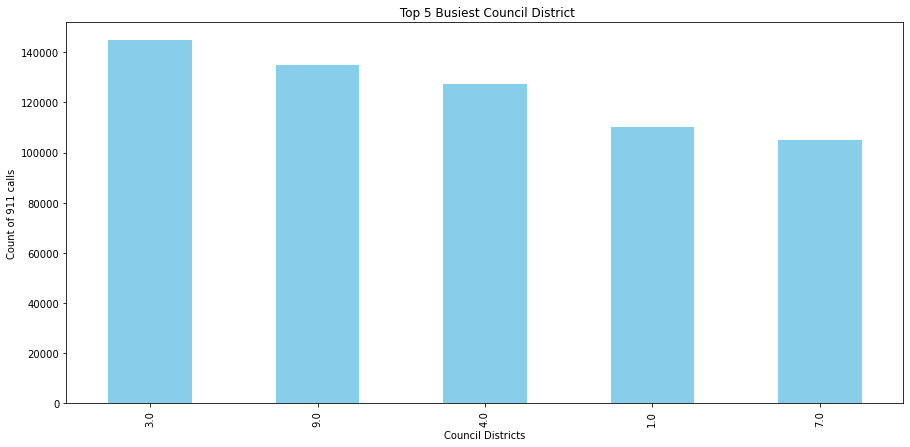

In [65]:
# visualize the top5 busiest areas
plt.figure(figsize=(15,7))
busiest_district.plot(kind='bar', color='skyblue')
plt.title(' Top 5 Busiest Council District')
plt.xlabel('Council Districts')
plt.ylabel('Count of 911 calls')
plt.show()

#### •	Identify sectors where mental health-related incidents make up more than 30% of the total incidents

In [66]:
#  calculate total incident per sector

total_incidents =df1.groupby('Sector').size()
# identify mental health incidents by sector
MH_incid = df1[df1['Mental_Health_Flag']=='Mental Health Incident'].groupby('Sector').size()

# Calculate the percentage of mental health-related incidents in each sector
(MH_incid / total_incidents) * 100

Sector
Adam      12.70
Airport    2.13
Baker     15.57
Charlie   12.18
David     15.16
Edward    11.00
Frank     13.29
George    15.23
Henry     11.30
Ida       12.58
Other       NaN
dtype: float64

- There are no sectors where mental health-related incidents make up more than 30% of the total incidents.

### •	What are the busiest days of the week, and how do the types of incidents differ across those days?

In [67]:
# Count the number of incidents by day of the week
busiest_days = df1['Response_Day_of_Week'].value_counts()
print("Incidents per Day of the Week:\n", busiest_days)

Incidents per Day of the Week:
 Fri    144065
Sat    140209
Mon    135379
Sun    134736
Thu    134146
Wed    133303
Tue    130990
Name: Response_Day_of_Week, dtype: int64


- The busiest days of the week are Friday(144065) and Saturday(140209)

In [68]:
# Count incident types for each of the busiest days
incident_types_by_day = pd.crosstab(index=df1['Response_Day_of_Week'],columns=df1['Incident_Type'])
print("Incident Types on Busiest Days:\n", incident_types_by_day)

Incident Types on Busiest Days:
 Incident_Type         Dispatched Incident
Response_Day_of_Week                     
Fri                                144065
Mon                                135379
Sat                                140209
Sun                                134736
Thu                                134146
Tue                                130990
Wed                                133303


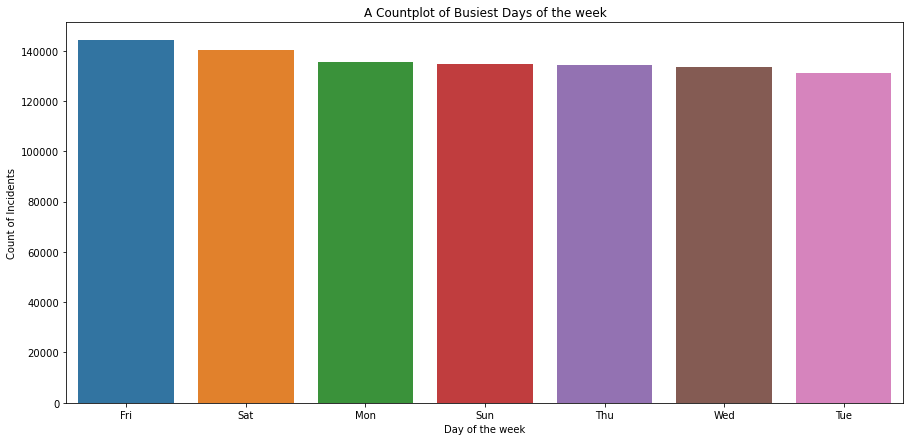

In [69]:
# create a visualization
plt.figure(figsize=(15, 7))
sns.barplot(x=busiest_days.index, y=busiest_days.values)
plt.title("A Countplot of Busiest Days of the week")
plt.xlabel("Day of the week")
plt.ylabel("Count of Incidents")
plt.show()

### •	What is the average response time for all incidents involving mental health issues?

In [70]:
# filter the data involving mental health issues
mental_health = df1[df1['Mental_Health_Flag']=='Mental Health Incident']

avg_response_time = mental_health.groupby(['Mental_Health_Flag'])['Response_Time'].mean()
print("The average response time for all incidents involving mental health issues:\n", avg_response_time)

The average response time for all incidents involving mental health issues:
 Mental_Health_Flag
Mental Health Incident   2378.16
Name: Response_Time, dtype: float64


### •	Find the geographic areas where the average number of units dispatched is greater than the average number of units dispatched across all areas.

In [71]:
# Calculate the overall average number of units dispatched
overall_avg_units_dispatched = df1['Number_of_Units_Arrived'].mean()
print(f"Overall Average Number of Units Dispatched: {overall_avg_units_dispatched}")

# Calculate average number of units dispatched by Council District
avg_units_by_councildist = df.groupby('Council_District')['Number_of_Units_Arrived'].mean()
print("\nAverage Units Dispatched by Council District:\n", avg_units_by_councildist)

Overall Average Number of Units Dispatched: 1.9278022896052593

Average Units Dispatched by Council District:
 Council_District
0.0    1.96
1.0    1.97
10.0   1.84
2.0    2.02
3.0    1.99
4.0    1.98
5.0    1.90
6.0    1.82
7.0    1.84
8.0    1.84
9.0    1.89
nan     NaN
Name: Number_of_Units_Arrived, dtype: float64


In [72]:
# Filter to find council districts where the average units dispatched is greater than the overall average
above_avg_units_council_district = avg_units_by_councildist[avg_units_by_councildist > overall_avg_units_dispatched]
print("\nCouncil Districts with Above-Average Units Dispatched:\n", above_avg_units_council_district)


Council Districts with Above-Average Units Dispatched:
 Council_District
0.0   1.96
1.0   1.97
2.0   2.02
3.0   1.99
4.0   1.98
Name: Number_of_Units_Arrived, dtype: float64


- Council District 0.0,1.0,2.0,3.0 and 4.0 have average units dispatched greater than the overall average.

#### •	Which sectors have the highest percentage of reclassified calls (where the final problem description differs from the initial one)?

In [73]:
# total number of reclassified calls (where the final problem description differs from the initial one)?
reclassified_calls = df1[(df1['Final_Problem_Descrip'])!=(df1['Initial_Problem_Descrip'])].shape[0]

# reclassified calls grouped by sector
reclassified_sector = df1[(df1['Final_Problem_Descrip'])!=(df1['Initial_Problem_Descrip'])].groupby('Sector').size()

# percentage of reclassified calls
percentage_reclassified = (reclassified_sector/reclassified_calls) * 100

print(percentage_reclassified.sort_values(ascending=False))

Sector
Edward    14.73
David     13.14
Frank     12.40
Charlie   11.62
Adam      11.56
Baker     10.47
Henry     10.07
Ida        9.59
George     5.50
Airport    0.92
Other      0.00
dtype: float64


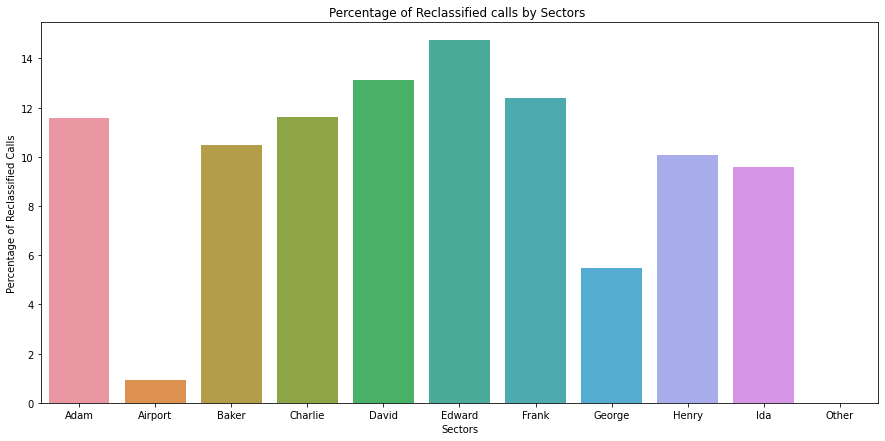

In [74]:
# create a visualization
plt.figure(figsize=(15, 7))
sns.barplot(x=percentage_reclassified.index, y=percentage_reclassified.values)
plt.title("Percentage of Reclassified calls by Sectors ")
plt.xlabel("Sectors")
plt.ylabel("Percentage of Reclassified Calls")
plt.show()

- Sectors Edward, David, Frank and Charlie have the highest percentage of reclassified calls.

#### •	What is the cumulative number of calls throughout each day, and how does this cumulative total change by sector?

In [75]:
# calculate the count of incidents per day
df1.groupby(['Response_Day_of_Week'])['Incident_Number'].count()

Response_Day_of_Week
Fri    144065
Mon    135379
Sat    140209
Sun    134736
Thu    134146
Tue    130990
Wed    133303
Name: Incident_Number, dtype: int64

In [76]:
# Create a new column 'Date' to hold just the date part
df1['Date'] = df1['Response_Datetime'].dt.date

# Sort the data by date and time to calculate cumulative totals
df1.sort_values(by=['Date', 'Response_Datetime'])

# Group by Date and Sector, then calculate the cumulative count of calls
df1['Cumulative_Calls'] = df1.groupby(['Date', 'Sector']).cumcount() + 1

In [77]:
df1.groupby(['Date','Sector'])['Cumulative_Calls'].count()

Date        Sector 
2021-06-22  Adam        59
            Airport      7
            Baker       57
            Charlie     52
            David       61
                      ... 
2024-09-30  Edward     119
            Frank       92
            George      50
            Henry       92
            Ida         82
Name: Cumulative_Calls, Length: 11971, dtype: int64

#### •	For each sector, rank the geographic areas by total number of 911 calls and show the response time for each area

In [78]:
# Group by Sector and Geo ID to calculate total calls and average response time
sector_geo_stats = df1.groupby(['Sector', 'Geo_ID']).agg(
    Total_Calls=('Incident_Number', 'size'),          # Count of calls
    Avg_Response_Time=('Response_Time', 'mean')       # Average response time
).reset_index()

In [79]:
# Rank the geographic areas by total calls within each sector
sector_geo_stats['Rank'] = sector_geo_stats.groupby('Sector')['Total_Calls'].rank(method='dense', ascending=False)

# Sort the data by Sector and Rank
sector_geo_stats = sector_geo_stats.sort_values(by=['Sector', 'Rank'])
print(sector_geo_stats)

     Sector          Geo_ID  Total_Calls  Avg_Response_Time  Rank
0      Adam 484530000000.00        73075            2480.08  1.00
1      Adam 484910000000.00        36928            2218.81  2.00
2   Airport 484540000000.00        16510             406.32  1.00
3     Baker 484530000000.00       101155            1779.95  1.00
4     Baker 484910000000.00            1            1175.00  2.00
5   Charlie 484530000000.00       105072            2243.07  1.00
7     David 484530000000.00       125714            1991.52  1.00
6     David 482090000000.00           92            2576.74  2.00
8    Edward 484530000000.00       137979            2908.24  1.00
9     Frank 484530000000.00       113262            2593.06  1.00
10   George 484530000000.00        52699            1471.25  1.00
11    Henry 484530000000.00        92724            2597.73  1.00
12    Henry 484540000000.00         2131            1357.19  2.00
13      Ida 484530000000.00        95481            2045.22  1.00
14    Othe

#### •	What are the most common types of incidents that occur between 10 PM and 6 AM?

In [80]:
# Filter data for incidents between 10 PM and 6 AM
night_incidents = df[(df['Response_Hour'] >= 22) | (df['Response_Hour'] < 6)]


# Count the most common incident types during the specified time range
common_night_incidents = night_incidents['Incident_Type'].value_counts()
print("Most Common Types of Incidents Between 10 PM and 6 AM:\n", common_night_incidents)

Most Common Types of Incidents Between 10 PM and 6 AM:
 Dispatched Incident    252444
Name: Incident_Type, dtype: int64


- Since there is just 1 incident type which is Dispatched Incident,all incident types between 10pm and 6am will be dispatched incidents only.

#### •	What percentage of incidents required more than 3 units to be dispatched?


In [81]:
# total number of incidents
total_incidents = len(df1)


# filter the data to more than 3 units
over_3units = df1[df1['Number_of_Units_Arrived']> 3].shape[0]

# percentage of incidents of more than 3 units
percent_incidents = (over_3units/total_incidents) * 100

print(f"Percentage of incidents with more than 3 units dispatched: {percent_incidents:.2f}%")

Percentage of incidents with more than 3 units dispatched: 7.62%


#### •	How do response times compare across different priorities for each type of incident?

In [82]:
df1.groupby(['Incident_Type','Priority_Level'])['Response_Time'].agg(['mean', 'median', 'min', 'max'])

mean  median  min       max
Incident_Type       Priority_Level                               
Dispatched Incident Priority 0      566.15  445.00 9.00  44708.00
                    Priority 1      756.15  533.00 6.00  56294.00
                    Priority 2     2050.02 1032.00 8.00 106104.00
                    Priority 3     5502.47 2521.00 0.00 182878.00

- The average response time for priority 0 (the highest priority) is 566 seconds, followed by priority 1(756 seconds).
- The last 2 priorities have the slowest average response times.

#### Which geographic areas have the highest number of incidents involving officer injuries or fatalities?

In [127]:
df1[df1['Officer_Injured/Killed_Cnt']>0]

,Incident_Number,Incident_Type,Mental_Health_Flag,Priority_Level,Response_Datetime,Response_Day_of_Week,Response_Hour,First_Unit_Arrived_Datetime,Call_Closed_Datetime,Sector,...,Response_Time,Officer_Injured/Killed_Cnt,Subject_Injured/Killed_Cnt,Other_Injured/Killed_Cnt,Geo_ID,Census_Block_Grp,Council_District,Date,Cumulative Calls,Cumulative_Calls
247015,233230425,Dispatched Incident,Mental Health Incident,Priority 1,2023-11-19 05:26:00,Sun,5.00,2023-11-19 06:28:00,2023-11-19 14:34:00,Baker,...,3834.00,1.00,0.00,0.00,484530000000.00,4530302002.00,10.0,2023-11-19,67,67


- Geo id 48453 has only 1 incident with officer injured or killed.

#### •	Which council districts have the highest average response times?

In [83]:
# group the council district by response time and sort the values in descending order
df1.groupby(['Council_District'])['Response_Time'].mean().sort_values(ascending=False)


Council_District
1.0    2609.95
4.0    2595.32
2.0    2426.08
6.0    2354.72
7.0    2345.27
3.0    2256.25
5.0    2101.05
8.0    1970.30
10.0   1903.00
9.0    1739.37
0.0    1703.55
Name: Response_Time, dtype: float64

- District 1.0 has  the slowest average response time of approximately 2610 seconds, followed by District 4.0 with a mean response time of 2595 seconds.
- District 0.0 has the fastest average response time of approximately 1704 seconds, followed by District 9.0 with an average response time of 1739 seconds.

#### •	How many incidents involve serious injury or death (either officers or subjects) related to mental health?

In [84]:
# Filter for incidents with serious injury or death for either officers or subjects
serious_injury_or_death = df1[(df1['Other_Injured/Killed_Cnt'] > 0)]

# Filter for mental health-related incidents among serious injury or death cases
mental_health_serious_incidents = serious_injury_or_death[serious_injury_or_death['Mental_Health_Flag'] == True]

# Get the count of incidents involving serious injury or death related to mental health
num_mental_health_serious_incidents = mental_health_serious_incidents.shape[0]
print("Number of mental health-related incidents involving serious injury or death:", num_mental_health_serious_incidents)

Number of mental health-related incidents involving serious injury or death: 0


#### •	Find the average response time for each incident type and compare it with the overall average response time

In [85]:
# overall average response time
overall_avg_response_time = df1['Response_Time'].mean()

print(f"The overall average response time:{overall_avg_response_time:.2f}")

# average response time for dispatched incidents
avg_response_incidenttype = df1.groupby(['Incident_Type'])['Response_Time'].mean()

print("\nAverage Response Time for each incident type:\n", avg_response_incidenttype)

The overall average response time:2254.09

Average Response Time for each incident type:
 Incident_Type
Dispatched Incident   2254.09
Name: Response_Time, dtype: float64


- Since there is only 1 incident type in the dataset, the overall average response time will be the same as the average response time per Incident type.

#### •For each day of the week, calculate the difference between the average response time for that day and the average response time for all days combined.

In [86]:
# filter the dataset to Response Day of the week = Monday
Mon_day_of_wk = df1[df1['Response_Day_of_Week']=='Mon']

# calculate the average response time for Monday
Mon_average_response_time = Mon_day_of_wk['Response_Time'].mean()

# calculate the overall average response time 
overall_responsetim = df1['Response_Time'].mean()

# difference between the average response time for Monday and the overall average response time
Mon_diff = Mon_average_response_time - overall_responsetim
print(f"The difference between the average response time for Monday and the average response time for all days:{Mon_diff:.2f}")


# filter the dataset to Response Day of the week = Tuesday
Tue_day_of_wk = df1[df1['Response_Day_of_Week']=='Tue']

# calculate the average response time for Tuesday
Tue_average_response_time = Tue_day_of_wk['Response_Time'].mean()

# difference between the average response time forTueday and the overall average response time
Tue_diff = Tue_average_response_time - overall_responsetim
print(f"The difference between the average response time for Tuesday and the average response time for all days:{Tue_diff:.2f}")

# filter the dataset to Response Day of the week = Wednesday
Wed_day_of_wk = df1[df1['Response_Day_of_Week']=='Wed']

# calculate the average response time for Wednesday
Wed_average_response_time = Wed_day_of_wk['Response_Time'].mean()

# difference between the average response time fo Wednesay and the overall average response time
Wed_diff = Wed_average_response_time - overall_responsetim
print(f"The difference between the average response time for Wednesday and the average response time for all days:{Wed_diff:.2f}")


# filter the dataset to Response Day of the week = Thursday
Thu_day_of_wk = df1[df1['Response_Day_of_Week']=='Thu']

# calculate the average response time for Thursday
Thu_average_response_time = Thu_day_of_wk['Response_Time'].mean()

# difference between the average response time for Thursday and the overall average response time
Thu_diff = Thu_average_response_time - overall_responsetim
print(f"The difference between the average response time for Thursday and the average response time for all days:{Thu_diff:.2f}")


# filter the dataset to Response Day of the week = Friday
Fri_day_of_wk = df1[df1['Response_Day_of_Week']=='Fri']

# calculate the average response time for Friday
Fri_average_response_time = Fri_day_of_wk['Response_Time'].mean()

# difference between the average response time for Friday and the overall average response time
Fri_diff = Fri_average_response_time - overall_responsetim
print(f"The difference between the average response time for Friday and the average response time for all days:{Fri_diff:.2f}")


# filter the dataset to Response Day of the week = Saturday
Sat_day_of_wk = df1[df1['Response_Day_of_Week']=='Sat']

# calculate the average response time for Saturday
Sat_average_response_time = Sat_day_of_wk['Response_Time'].mean()

# difference between the average response time for Saturday and the overall average response time
Sat_diff =Sat_average_response_time - overall_responsetim

print(f"The difference between the average response time for Saturday and the average response time for all days:{Sat_diff:.2f}")

# filter the dataset to Response Day of the week = Sunday
Sun_day_of_wk = df1[df1['Response_Day_of_Week']=='Sun']

# calculate the average response time for Sunday
Sun_average_response_time = Sun_day_of_wk['Response_Time'].mean()

# difference between the average response time for Sunday and the overall average response time
Sun_diff = Sun_average_response_time - overall_responsetim
print(f"The difference between the average response time for Sunday and the average response time for all days:{Sun_diff:.2f}")

The difference between the average response time for Monday and the average response time for all days:54.70
The difference between the average response time for Tuesday and the average response time for all days:-2.61
The difference between the average response time for Wednesday and the average response time for all days:23.78
The difference between the average response time for Thursday and the average response time for all days:-49.47
The difference between the average response time for Friday and the average response time for all days:-371.47
The difference between the average response time for Saturday and the average response time for all days:266.05
The difference between the average response time for Sunday and the average response time for all days:93.64


#### •	What are the top 3 most frequent final problem descriptions?

In [87]:
top3_final_problem_descrp = df1['Final_Problem_Descrip'].value_counts(ascending=False).head(3)
print("The top 3 most frequent final problem descriptions:\n",top3_final_problem_descrp)

The top 3 most frequent final problem descriptions:
 Trespass Urgent      73749
Disturbance Other    55748
Suspicious Person    55344
Name: Final_Problem_Descrip, dtype: int64


#### • What are the busiest times of the day, and how do incident types vary by time?

In [88]:
# Count the number of incidents per hour
incident_counts_by_hour = df1['Response_Hour'].value_counts().sort_index()

# Display busiest times
print("Incident Counts by Hour:\n", incident_counts_by_hour)

Incident Counts by Hour:
 0.00     38068
1.00     32031
2.00     29590
3.00     24421
4.00     20509
5.00     19731
6.00     24906
7.00     32810
8.00     38251
9.00     39780
10.00    41603
11.00    42630
12.00    44409
13.00    44804
14.00    45175
15.00    48034
16.00    50068
17.00    51921
18.00    51234
19.00    48791
20.00    48063
21.00    47905
22.00    46002
23.00    42092
Name: Response_Hour, dtype: int64


In [89]:
# Group by hour and incident type, then count the occurrences
incident_type_by_hour = df1.groupby(['Response_Hour', 'Incident_Type']).size().unstack(fill_value=0)

# Display incident types by hour (showing a subset for easier viewing if large)
print("Incident Types by Hour:\n", incident_type_by_hour)

Incident Types by Hour:
 Incident_Type  Dispatched Incident
Response_Hour                     
0.00                         38068
1.00                         32031
2.00                         29590
3.00                         24421
4.00                         20509
5.00                         19731
6.00                         24906
7.00                         32810
8.00                         38251
9.00                         39780
10.00                        41603
11.00                        42630
12.00                        44409
13.00                        44804
14.00                        45175
15.00                        48034
16.00                        50068
17.00                        51921
18.00                        51234
19.00                        48791
20.00                        48063
21.00                        47905
22.00                        46002
23.00                        42092


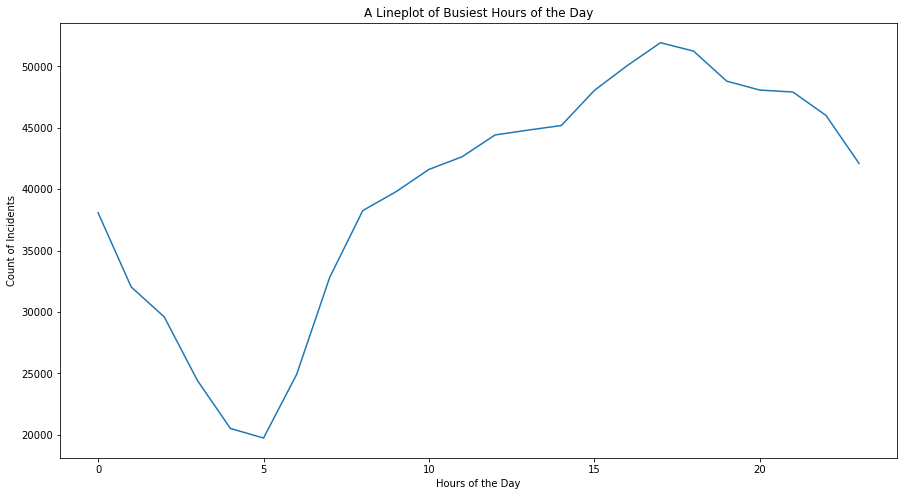

In [90]:
#visualization
plt.figure(figsize=(15,8))
sns.lineplot(data=incident_counts_by_hour,x=incident_counts_by_hour.index,y=incident_counts_by_hour.values)
plt.title("A Lineplot of Busiest Hours of the Day")
plt.xlabel("Hours of the Day")
plt.ylabel("Count of Incidents")
plt.show()

- The peak hours of the day are 17:00(5pm) and 18:00(6pm).
- The least busiest time of the day is 5am. 

#### •	What is the total number of mental health-related incidents, and how has this changed over time?

In [91]:
# filter the dataset to mental health-related incidents
no_mental_health_incidents = df1[df1['Mental_Health_Flag']=='Mental Health Incident'].shape[0]

print('The total number of mental health-related incidents is',no_mental_health_incidents)

The total number of mental health-related incidents is 122917


In [92]:
# filter the data to Mental Health incident
mental_health_incidents = df1[df1['Mental_Health_Flag']=='Mental Health Incident']
# extract the month and year from Response Datetime and create a new column 
mental_health_incidents['Response_Month'] = mental_health_incidents['Response_Datetime'].dt.to_period('M')
# groupby month and year to observe trend over time
mental_health_trend =mental_health_incidents.groupby('Response_Month').size()

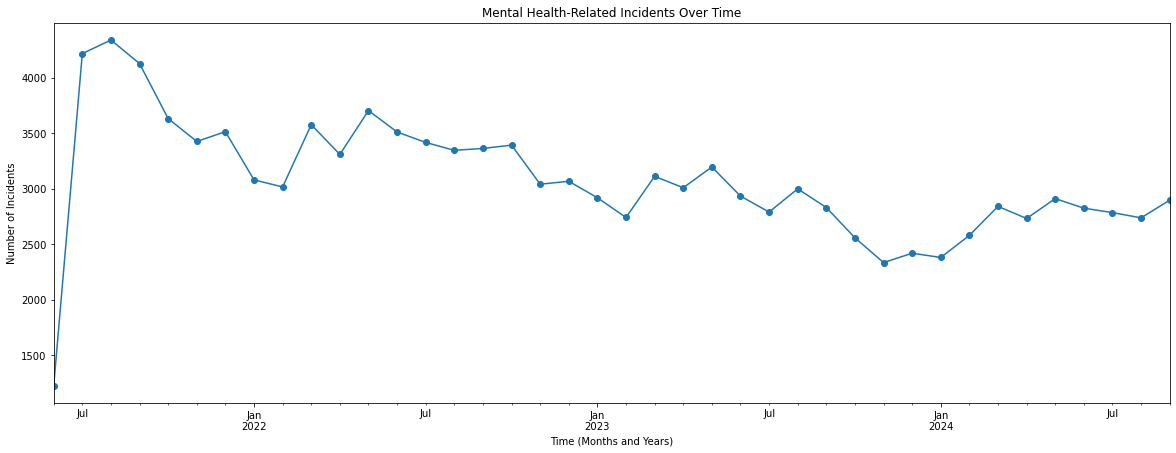

In [93]:
# plot mental health-related incident over time
plt.figure(figsize=(20,7))
mental_health_trend.plot(kind='line',marker='o',title='Mental Health-Related Incidents Over Time')
plt.xlabel("Time (Months and Years)")
plt.ylabel("Number of Incidents")
plt.show()

- There is a downward progression in the chart above from 2019 to 2024.
- The total number of mental health incidents has decreased over the years.

#### •	Which sectors have above-average mental health-related incidents compared to the overall average for all sectors?

In [94]:
# Filter for mental health-related incidents
mental_health_incidents = df1[df1['Mental_Health_Flag'] == 'Mental Health Incident']

# Calculate the count of mental health-related incidents in each sector
sector_mental_health_counts = mental_health_incidents.groupby('Sector').size()

# Calculate the overall average of mental health-related incidents
overall_avg_mental_health_incidents = sector_mental_health_counts.mean()
print(f"Overall Average Mental Health-Related Incidents: {overall_avg_mental_health_incidents}")

Overall Average Mental Health-Related Incidents: 12291.7


In [95]:
# Filter sectors with above-average mental health-related incidents
above_avg_sectors = sector_mental_health_counts[sector_mental_health_counts > overall_avg_mental_health_incidents]
print("Sectors with Above-Average Mental Health-Related Incidents:\n", above_avg_sectors)

Sectors with Above-Average Mental Health-Related Incidents:
 Sector
Adam       13975
Baker      15753
Charlie    12794
David      19068
Edward     15174
Frank      15054
dtype: int64


#### •	What is the average time spent on scene by units across different types of incidents?

In [96]:
# calculate the average time spent on scene by units
avgtime_incidentstypes= df1.groupby(['Incident_Type'])['Unit_Time_on_Scene'].mean()
print("\nThe average time spent on scene by all APD units across incident types\n",avgtime_incidentstypes)


The average time spent on scene by all APD units across incident types
 Incident_Type
Dispatched Incident   6090.61
Name: Unit_Time_on_Scene, dtype: float64


#### •	What is the distribution of response times across the sectors, and which sectors have the fastest and slowest response times?

In [97]:
# Calculate the average, minimum, and maximum response times per sector
sector_response_stats = df1.groupby('Sector')['Response_Time'].agg(['mean', 'min', 'max']).rename(columns={'mean': 'Average Response Time', 'min': 'Fastest Response Time', 'max': 'Slowest Response Time'})
print("Response Time Statistics by Sector:\n", sector_response_stats)

Response Time Statistics by Sector:
          Average Response Time  Fastest Response Time  Slowest Response Time
Sector                                                                      
Adam                   2392.37                   0.00               95812.00
Airport                 406.32                   6.00               22856.00
Baker                  1779.93                   0.00               89374.00
Charlie                2243.05                  12.00               90629.00
David                  1991.94                   0.00               88340.00
Edward                 2908.24                   9.00              160425.00
Frank                  2593.06                  10.00              182878.00
George                 1471.25                  10.00               48165.00
Henry                  2569.86                   9.00              159892.00
Ida                    2045.22                  10.00              135889.00
Other                   710.00         

In [98]:
# Find the sector with the fastest average response time
fastest_sector = sector_response_stats['Average Response Time'].idxmin()
fastest_response_time = sector_response_stats['Average Response Time'].min()

# Find the sector with the slowest average response time
slowest_sector = sector_response_stats['Average Response Time'].idxmax()
slowest_response_time = sector_response_stats['Average Response Time'].max()

print(f"Sector with Fastest Average Response Time: {fastest_sector} ({fastest_response_time:.2f} seconds)")
print(f"Sector with Slowest Average Response Time: {slowest_sector} ({slowest_response_time:.2f} seconds)")

Sector with Fastest Average Response Time: Airport (406.32 seconds)
Sector with Slowest Average Response Time: Edward (2908.24 seconds)


#### •	Which incidents have the longest on-scene time, and how does this correlate with the incident type or priority level?

In [99]:
# Sort incidents by 'Unit Time on Scene' in descending order
longest_on_scene = df1.sort_values(by='Unit_Time_on_Scene', ascending=False)

# Display the top 10 incidents with the longest on-scene time
print("Top 10 Incidents with Longest On-Scene Time:\n", longest_on_scene[['Incident_Number', 'Incident_Type', 'Priority_Level', 'Unit_Time_on_Scene']].head(10))

Top 10 Incidents with Longest On-Scene Time:
        Incident_Number        Incident_Type Priority_Level  Unit_Time_on_Scene
253020       233150232  Dispatched Incident     Priority 0          2460453.00
580399       222660503  Dispatched Incident     Priority 0          1469292.00
652224       221781597  Dispatched Incident     Priority 1          1348648.00
105988       241420647  Dispatched Incident     Priority 3          1242710.00
329010       232181241  Dispatched Incident     Priority 3          1231068.00
15814        242541371  Dispatched Incident     Priority 0          1212460.00
235644       233390551  Dispatched Incident     Priority 0          1155427.00
238014       233360503  Dispatched Incident     Priority 0          1099735.00
64618        241930606  Dispatched Incident     Priority 0          1083230.00
235373       233391146  Dispatched Incident     Priority 0          1059150.00


In [100]:
# Calculate the average on-scene time for each incident type and priority level
avg_on_scene_by_type_priority = df1.groupby(['Incident_Type', 'Priority_Level'])['Unit_Time_on_Scene'].mean().sort_values(ascending=False)

# Display the results
print("Average On-Scene Time by Incident Type and Priority Level:\n", avg_on_scene_by_type_priority)

Average On-Scene Time by Incident Type and Priority Level:
 Incident_Type        Priority_Level
Dispatched Incident  Priority 0       12493.74
                     Priority 1        8508.56
                     Priority 2        4323.99
                     Priority 3        4055.74
Name: Unit_Time_on_Scene, dtype: float64


#### •	Which types of incidents typically require reports to be written, and how frequently do these occur?

In [101]:
# filter the dataframe that require written reports
data_written_reports = df1[df['Report_Written_Flag']=='Yes']

# calculate the frequency of each type of incident
report_freq_by_type= data_written_reports['Incident_Type'].value_counts()

print("Frequency of Incident Types Requiring Reports:\n", report_freq_by_type)

Frequency of Incident Types Requiring Reports:
 Dispatched Incident    244315
Name: Incident_Type, dtype: int64


#### •	What is the average number of units dispatched to incidents based on the incident type?

In [102]:
# calculate the average number of units dispatched to incident by incident type
avg_noof_units_by_incidenttype = df1.groupby(['Incident_Type'])['Number_of_Units_Arrived'].mean()

print("The average number of units that arrived on scene:\n",avg_noof_units_by_incidenttype)

The average number of units that arrived on scene:
 Incident_Type
Dispatched Incident   1.93
Name: Number_of_Units_Arrived, dtype: float64


#### •	How do incidents involving officer injuries correlate with mental health-related flags, and which sectors have the highest occurrence of these incidents?

In [103]:
# Filter for incidents involving officer injuries and mental health-related flag
injury_and_mental_health_incidents = df1[(df1['Officer_Injured/Killed_Cnt'] > 0) & (df['Mental_Health_Flag'] == 'Mental Health Incident')]

In [104]:
# Count occurrences by sector for incidents involving officer injuries and mental health flags
sector_injury_mental_health_counts= injury_and_mental_health_incidents['Sector'].value_counts()

print("Sectors with Highest Occurrences of Officer Injuries in Mental Health-Related Incidents:\n", sector_injury_mental_health_counts.head())

Sectors with Highest Occurrences of Officer Injuries in Mental Health-Related Incidents:
 Baker    1
Name: Sector, dtype: int64


In [105]:
print(df['Response_Day_of_Week'].value_counts())

Fri    144065
Sat    140209
Mon    135379
Sun    134736
Thu    134146
Wed    133303
Tue    130990
Name: Response_Day_of_Week, dtype: int64


### Conclusions and Recommendations

#### Conclusions

- 22:00(10pm) has the fastest average response time while 13:00(1pm) has the slowest average response time.
- Edward Sector has the highest number of incidents while Airport Sector has the least number of incidents.
- The top 5 busiest council districts are Districts 3.0, 9.0,4.0,1.0 and 7.0.
- There are no sectors where mental health-related incidents make up more than 30% of the total incidents.
- Fridays and Saturdays are the busiest days of the week.
- Approximately 8% of incidents require more than 3 units to be dispatched.
- Districts 0.0,9.0 have the fastest average response times.
- There are no incidents related to mental health involving officers or subjects injuries.
- The top 3 most frequent final problem descriptions are Tresspass,Disturbance and Suspicious.
- The busiest hour of the day is 17:00(5pm) followed by 18:00(6pm).
- The least busiest hoour of the day is 5am.
- The average number of units dispatched is approximately 2 units.
- Airport Sector has the fastest average response time(406 seconds) while Edward Sector has the slowest average response time(2908 seconds).
- Mental health- related incidents have a mean response time of 2378 seconds compared to Not-mental health incidents(2235 seconds).
- The total number of mental health-related incidents has decreased over the years.

#### Recommendations

- Since 13:00(1pm) has the slowest average response time while 22:00(10pm) has the fastest average response time, Adjustments can be made to align officers with the demand patterns. Increasing availability around 13:00(1pm) may help reduce delays.
- For Edward sector having the slowest average response time, we can prioritize more units to speed up the response times.
- The Sectors and Council Districts with high incident counts indicate that those districts and sectors require more units to handle demands.
- Reallocating units from lower incident areas and increasing officers during peak hours(4pm to 6pm) could improve response times.
- With Fridays and Saturdays as the busiest days, ensure that Officers and units are allocated during these days and especially around the busiest times to meet demands.
- Since the response time for mental health-related incidents is longer than not mental health incidents,mental health response trainings should be implemented for sectors with high incident rates. Trainings could help officers manage mental health incidents and reduce response times significantly.
- Since the busiest times commences at 16:00(4pM), 17:00(5pm) and 18:00(6pm), officers should be prepared for those hours.Schedules can be adjusted so that more units are available during the busiest times and less officers for off-peak hours.
